In [1]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from itertools import combinations 
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
import copy 

Using TensorFlow backend.
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtype

CPU times: user 2.51 s, sys: 742 ms, total: 3.25 s
Wall time: 6.95 s


In [2]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)
df=df[df['label']<3]

In [5]:
features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')
df_new_1

70


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,label,age,height,weight,gender_ female,coffee_today_YES,sport_today_YES,smoker_YES,feel_ill_today_YES,bmi
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,0,27,175,80,0,0,0,0,0,1
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,0,27,175,80,0,0,0,0,0,1
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,0,27,175,80,0,0,0,0,0,1
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,0,27,175,80,0,0,0,0,0,1
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,0,27,175,80,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.029441,0.002093,0.020770,0.054100,-0.004075,0.002093,-0.014956,0.018375,-0.000003,1.440095e-06,...,1,29,165,55,1,0,0,0,0,0
932,0.029484,0.002074,0.020918,0.053804,-0.004624,0.002074,-0.015439,0.017447,-0.000003,1.427082e-06,...,1,29,165,55,1,0,0,0,0,0
933,0.032744,0.000516,0.029211,0.034857,-0.029334,0.000516,-0.031478,-0.025832,-0.000020,3.552867e-07,...,2,29,165,55,1,0,0,0,0,0
934,0.030006,0.007051,0.002966,0.070357,-0.027424,0.007051,-0.067796,-0.000404,-0.000019,4.851210e-06,...,2,29,165,55,1,0,0,0,0,0


In [1]:
sel_fea=['EDA_tonic_mean',
 'EDA_tonic_max',
 'EDA_tonic_min',
 'EDA_phasic_mean',
 'EDA_smna_mean',
 'EDA_phasic_min',
 'EMG_std',
 'c_ACC_y_min',
 'sport_today_YES',
 'ECG_std',
 'c_ACC_x_std',
 'c_ACC_y_std']

len(sel_fea)

12

In [7]:
train=df_new_1[df_new_1['subject']<=9]
test=df_new_1[df_new_1['subject']>9]

In [8]:
et = ExtraTreesClassifier(n_estimators=50,n_jobs=10,random_state=39)
et.fit(train[sel_fea],train['label'])
y_pred=et.predict(test[sel_fea])

print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       147
           1       0.92      0.89      0.91       161
           2       0.81      0.92      0.86       146

    accuracy                           0.87       454
   macro avg       0.87      0.87      0.87       454
weighted avg       0.87      0.87      0.87       454



In [8]:
d=[]
for i in range(len(sel_fea)):
     d.append([sel_fea[i],list(et.feature_importances_)[i]*100])
d.sort(key=lambda x: x[1])
d

[['sport_today_YES', 2.396418275963685],
 ['c_ACC_y_std', 3.253514957385321],
 ['c_ACC_x_std', 3.2674245328856455],
 ['EDA_phasic_min', 3.270767056076939],
 ['EDA_smna_mean', 4.987500254554531],
 ['EDA_phasic_mean', 5.2645178966884565],
 ['ECG_std', 5.65609330837797],
 ['EMG_std', 8.210370175453424],
 ['c_ACC_y_min', 8.760812619931722],
 ['EDA_tonic_min', 12.586199296883818],
 ['EDA_tonic_mean', 20.44767629919284],
 ['EDA_tonic_max', 21.89870532660564]]

Current size: [15.0, 10.0]


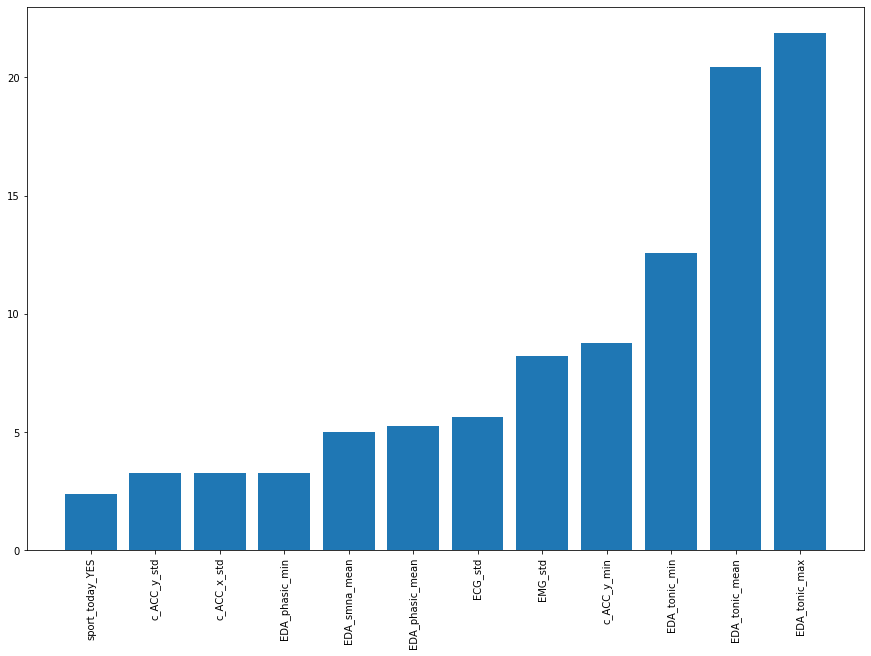

<Figure size 360x1080 with 0 Axes>

In [10]:
names = []
values = []
for i in d:
    names.append(i[0])
    values.append(i[1])
plt.bar(names, values)
plt.xticks(rotation=90)
plt.figure(figsize=(5,15))
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [9]:
test_sub=[10,11,13,14,15,16,17]
for i in test_sub:
    print(i)
    train=df_new_1[df_new_1['subject']<=9]
    test=df_new_1[df_new_1['subject']==i]

    et.fit(train[sel_fea],train['label'])
    y_pred=et.predict(test[sel_fea])
    print(classification_report(test['label'],y_pred))

10
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       1.00      1.00      1.00        28
           2       0.91      1.00      0.95        30

    accuracy                           0.96        79
   macro avg       0.97      0.95      0.96        79
weighted avg       0.97      0.96      0.96        79

11
              precision    recall  f1-score   support

           0       0.82      0.43      0.56        21
           1       0.83      0.80      0.82        25
           2       0.69      1.00      0.81        24

    accuracy                           0.76        70
   macro avg       0.78      0.74      0.73        70
weighted avg       0.78      0.76      0.74        70

13
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        21
           1       1.00      1.00      1.00        30
           2       0.86      0.76      0.81        33

    accurac

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50,n_jobs=10,random_state=0)
clf.fit(train[sel_fea],train['label'])
y_pred=clf.predict(test[sel_fea])
print(classification_report(test['label'],y_pred))


              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.27      0.20      0.23        15
           2       0.56      1.00      0.72         9

    accuracy                           0.56        45
   macro avg       0.52      0.61      0.54        45
weighted avg       0.54      0.56      0.53        45



In [33]:
test_sub=[10,11,13,14,15,16,17]
for i in test_sub:
    print(i)
    train=df_new_1[df_new_1['subject']<=9]
    test=df_new_1[df_new_1['subject']==i]

    clf.fit(train[sel_fea],train['label'])
    y_pred=clf.predict(test[sel_fea])
    print(classification_report(test['label'],y_pred))

10
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       1.00      0.89      0.94        28
           2       0.83      0.97      0.89        30

    accuracy                           0.87        79
   macro avg       0.87      0.86      0.86        79
weighted avg       0.88      0.87      0.87        79

11
              precision    recall  f1-score   support

           0       0.50      0.43      0.46        21
           1       0.80      0.64      0.71        25
           2       0.66      0.88      0.75        24

    accuracy                           0.66        70
   macro avg       0.65      0.65      0.64        70
weighted avg       0.66      0.66      0.65        70

13
              precision    recall  f1-score   support

           0       0.53      0.90      0.67        21
           1       1.00      0.97      0.98        30
           2       0.89      0.52      0.65        33

    accurac

# GaussianNB

In [34]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(train[sel_fea],train['label'])
y_pred=clf.predict(test[sel_fea])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43        21
           1       0.25      0.27      0.26        15
           2       0.88      0.78      0.82         9

    accuracy                           0.44        45
   macro avg       0.52      0.49      0.50        45
weighted avg       0.46      0.44      0.45        45



In [35]:
test_sub=[10,11,13,14,15,16,17]
for i in test_sub:
    print(i)
    train=df_new_1[df_new_1['subject']<=9]
    test=df_new_1[df_new_1['subject']==i]

    clf.fit(train[sel_fea],train['label'])
    y_pred=clf.predict(test[sel_fea])
    print(classification_report(test['label'],y_pred))

10
              precision    recall  f1-score   support

           0       0.56      0.24      0.33        21
           1       1.00      0.86      0.92        28
           2       0.65      1.00      0.79        30

    accuracy                           0.75        79
   macro avg       0.74      0.70      0.68        79
weighted avg       0.75      0.75      0.72        79

11
              precision    recall  f1-score   support

           0       0.39      0.43      0.41        21
           1       0.73      0.64      0.68        25
           2       0.68      0.71      0.69        24

    accuracy                           0.60        70
   macro avg       0.60      0.59      0.59        70
weighted avg       0.61      0.60      0.60        70

13
              precision    recall  f1-score   support

           0       0.50      0.95      0.66        21
           1       0.89      0.83      0.86        30
           2       0.94      0.45      0.61        33

    accurac

# GradientBoosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=50)
clf.fit(train[sel_fea],train['label'])
y_pred=clf.predict(test[sel_fea])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        21
           1       0.56      0.60      0.58        15
           2       0.54      0.78      0.64         9

    accuracy                           0.67        45
   macro avg       0.66      0.68      0.66        45
weighted avg       0.70      0.67      0.67        45



In [37]:
test_sub=[10,11,13,14,15,16,17]
for i in test_sub:
    print(i)
    train=df_new_1[df_new_1['subject']<=9]
    test=df_new_1[df_new_1['subject']==i]

    clf.fit(train[sel_fea],train['label'])
    y_pred=clf.predict(test[sel_fea])
    print(classification_report(test['label'],y_pred))

10
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       1.00      1.00      1.00        28
           2       0.82      0.93      0.87        30

    accuracy                           0.90        79
   macro avg       0.90      0.88      0.89        79
weighted avg       0.90      0.90      0.90        79

11
              precision    recall  f1-score   support

           0       0.71      0.48      0.57        21
           1       0.85      0.92      0.88        25
           2       0.72      0.88      0.79        24

    accuracy                           0.77        70
   macro avg       0.76      0.76      0.75        70
weighted avg       0.77      0.77      0.76        70

13
              precision    recall  f1-score   support

           0       0.66      0.90      0.76        21
           1       1.00      1.00      1.00        30
           2       0.92      0.70      0.79        33

    accurac

# LogisticRegression


In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train[sel_fea],train['label'])
y_pred=clf.predict(test[sel_fea])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.17      0.14      0.15        21
           1       0.00      0.00      0.00        15
           2       0.58      0.78      0.67         9

    accuracy                           0.22        45
   macro avg       0.25      0.31      0.27        45
weighted avg       0.19      0.22      0.21        45



/home/sf/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sf/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [39]:
test_sub=[10,11,13,14,15,16,17]
for i in test_sub:
    print(i)
    train=df_new_1[df_new_1['subject']<=9]
    test=df_new_1[df_new_1['subject']==i]

    clf.fit(train[sel_fea],train['label'])
    y_pred=clf.predict(test[sel_fea])
    print(classification_report(test['label'],y_pred))

10
              precision    recall  f1-score   support

           0       0.53      0.38      0.44        21
           1       1.00      0.86      0.92        28
           2       0.68      0.90      0.77        30

    accuracy                           0.75        79
   macro avg       0.74      0.71      0.71        79
weighted avg       0.75      0.75      0.74        79

11
              precision    recall  f1-score   support

           0       0.33      0.48      0.39        21
           1       0.71      0.48      0.57        25
           2       0.74      0.71      0.72        24

    accuracy                           0.56        70
   macro avg       0.59      0.55      0.56        70
weighted avg       0.61      0.56      0.57        70

13
              precision    recall  f1-score   support

           0       0.43      0.76      0.55        21
           1       0.94      0.97      0.95        30
           2       0.81      0.39      0.53        33

    accurac

/home/sf/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sf/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/sf/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sf/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/sf/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

# xgboost

In [40]:
from xgboost import XGBClassifier
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators = 10)
clf.fit(train[sel_fea],train['label'])
y_pred=clf.predict(test[sel_fea])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        21
           1       0.46      0.40      0.43        15
           2       0.56      1.00      0.72         9

    accuracy                           0.64        45
   macro avg       0.63      0.69      0.64        45
weighted avg       0.67      0.64      0.64        45



In [41]:
test_sub=[10,11,13,14,15,16,17]
for i in test_sub:
    print(i)
    train=df_new_1[df_new_1['subject']<=9]
    test=df_new_1[df_new_1['subject']==i]

    clf.fit(train[sel_fea],train['label'])
    y_pred=clf.predict(test[sel_fea])
    print(classification_report(test['label'],y_pred))

10
              precision    recall  f1-score   support

           0       0.87      0.62      0.72        21
           1       1.00      1.00      1.00        28
           2       0.78      0.93      0.85        30

    accuracy                           0.87        79
   macro avg       0.88      0.85      0.86        79
weighted avg       0.88      0.87      0.87        79

11
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        21
           1       0.78      0.84      0.81        25
           2       0.67      0.92      0.77        24

    accuracy                           0.70        70
   macro avg       0.68      0.68      0.66        70
weighted avg       0.69      0.70      0.67        70

13
              precision    recall  f1-score   support

           0       0.53      0.76      0.63        21
           1       0.94      1.00      0.97        30
           2       0.86      0.58      0.69        33

    accurac

# DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = xgb.XGBClassifier(n_estimators = 10)
clf.fit(train[sel_fea],train['label'])
y_pred=clf.predict(test[sel_fea])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        21
           1       0.46      0.40      0.43        15
           2       0.56      1.00      0.72         9

    accuracy                           0.64        45
   macro avg       0.63      0.69      0.64        45
weighted avg       0.67      0.64      0.64        45



In [43]:
test_sub=[10,11,13,14,15,16,17]
for i in test_sub:
    print(i)
    train=df_new_1[df_new_1['subject']<=9]
    test=df_new_1[df_new_1['subject']==i]

    clf.fit(train[sel_fea],train['label'])
    y_pred=clf.predict(test[sel_fea])
    print(classification_report(test['label'],y_pred))

10
              precision    recall  f1-score   support

           0       0.87      0.62      0.72        21
           1       1.00      1.00      1.00        28
           2       0.78      0.93      0.85        30

    accuracy                           0.87        79
   macro avg       0.88      0.85      0.86        79
weighted avg       0.88      0.87      0.87        79

11
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        21
           1       0.78      0.84      0.81        25
           2       0.67      0.92      0.77        24

    accuracy                           0.70        70
   macro avg       0.68      0.68      0.66        70
weighted avg       0.69      0.70      0.67        70

13
              precision    recall  f1-score   support

           0       0.53      0.76      0.63        21
           1       0.94      1.00      0.97        30
           2       0.86      0.58      0.69        33

    accurac

# SVM Linear

In [44]:
from sklearn import svm
clf = svm.SVC(kernel='linear') 
clf.fit(train[sel_fea],train['label'])
y_pred=clf.predict(test[sel_fea])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.21      0.14      0.17        21
           1       0.12      0.13      0.12        15
           2       0.64      1.00      0.78         9

    accuracy                           0.31        45
   macro avg       0.32      0.43      0.36        45
weighted avg       0.27      0.31      0.28        45



In [45]:
test_sub=[10,11,13,14,15,16,17]
for i in test_sub:
    print(i)
    train=df_new_1[df_new_1['subject']<=9]
    test=df_new_1[df_new_1['subject']==i]

    clf.fit(train[sel_fea],train['label'])
    y_pred=clf.predict(test[sel_fea])
    print(classification_report(test['label'],y_pred))

10
              precision    recall  f1-score   support

           0       0.50      0.10      0.16        21
           1       1.00      0.96      0.98        28
           2       0.60      0.97      0.74        30

    accuracy                           0.73        79
   macro avg       0.70      0.68      0.63        79
weighted avg       0.72      0.73      0.67        79

11
              precision    recall  f1-score   support

           0       0.33      0.38      0.36        21
           1       0.72      0.52      0.60        25
           2       0.71      0.83      0.77        24

    accuracy                           0.59        70
   macro avg       0.59      0.58      0.58        70
weighted avg       0.60      0.59      0.59        70

13
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        21
           1       1.00      1.00      1.00        30
           2       0.76      0.67      0.71        33

    accurac

# SVM Poly

In [52]:
from sklearn import svm
clf = svm.SVC(kernel='poly') 
clf.fit(train[sel_fea],train['label'])
y_pred=clf.predict(test[sel_fea])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.10      0.07      0.08        15
           2       0.27      1.00      0.43         9

    accuracy                           0.22        45
   macro avg       0.12      0.36      0.17        45
weighted avg       0.09      0.22      0.11        45



/home/sf/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
test_sub=[10,11,13,14,15,16,17]
for i in test_sub:
    print(i)
    train=df_new_1[df_new_1['subject']<=9]
    test=df_new_1[df_new_1['subject']==i]

    clf.fit(train[sel_fea],train['label'])
    y_pred=clf.predict(test[sel_fea])
    print(classification_report(test['label'],y_pred))

10
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       1.00      0.61      0.76        28
           2       0.49      1.00      0.66        30

    accuracy                           0.59        79
   macro avg       0.50      0.54      0.47        79
weighted avg       0.54      0.59      0.52        79

11
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        21
           1       0.73      0.32      0.44        25
           2       0.45      1.00      0.62        24

    accuracy                           0.50        70
   macro avg       0.56      0.49      0.43        70
weighted avg       0.56      0.50      0.44        70

13
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       1.00      0.63      0.78        30
           2       0.52      1.00      0.69        33

    accurac

/home/sf/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sf/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sf/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sf/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureW

# SVM rbf

In [50]:
from sklearn import svm
clf = svm.SVC(kernel='rbf') 
clf.fit(train[sel_fea],train['label'])
y_pred=clf.predict(test[sel_fea])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.14      0.05      0.07        21
           1       0.21      0.27      0.24        15
           2       0.47      1.00      0.64         9

    accuracy                           0.31        45
   macro avg       0.28      0.44      0.32        45
weighted avg       0.23      0.31      0.24        45



/home/sf/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [51]:
test_sub=[10,11,13,14,15,16,17]
for i in test_sub:
    print(i)
    train=df_new_1[df_new_1['subject']<=9]
    test=df_new_1[df_new_1['subject']==i]

    clf.fit(train[sel_fea],train['label'])
    y_pred=clf.predict(test[sel_fea])
    print(classification_report(test['label'],y_pred))

10
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       1.00      0.93      0.96        28
           2       0.57      1.00      0.72        30

    accuracy                           0.71        79
   macro avg       0.52      0.64      0.56        79
weighted avg       0.57      0.71      0.62        79

11
              precision    recall  f1-score   support

           0       0.43      0.29      0.34        21
           1       0.71      0.48      0.57        25
           2       0.62      1.00      0.76        24

    accuracy                           0.60        70
   macro avg       0.58      0.59      0.56        70
weighted avg       0.59      0.60      0.57        70

13
              precision    recall  f1-score   support

           0       0.93      0.62      0.74        21
           1       0.97      1.00      0.98        30
           2       0.82      0.97      0.89        33

    accurac

/home/sf/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sf/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sf/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto

# AdaBoost

In [54]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50,learning_rate=1)
clf.fit(train[sel_fea],train['label'])
y_pred=clf.predict(test[sel_fea])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       1.00      0.93      0.97        15
           2       0.64      1.00      0.78         9

    accuracy                           0.89        45
   macro avg       0.88      0.91      0.88        45
weighted avg       0.93      0.89      0.90        45



In [55]:
test_sub=[10,11,13,14,15,16,17]
for i in test_sub:
    print(i)
    train=df_new_1[df_new_1['subject']<=9]
    test=df_new_1[df_new_1['subject']==i]

    clf.fit(train[sel_fea],train['label'])
    y_pred=clf.predict(test[sel_fea])
    print(classification_report(test['label'],y_pred))

10
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.80      0.14      0.24        28
           2       0.58      0.97      0.72        30

    accuracy                           0.42        79
   macro avg       0.46      0.37      0.32        79
weighted avg       0.50      0.42      0.36        79

11
              precision    recall  f1-score   support

           0       0.43      0.29      0.34        21
           1       0.94      0.68      0.79        25
           2       0.61      0.96      0.74        24

    accuracy                           0.66        70
   macro avg       0.66      0.64      0.63        70
weighted avg       0.67      0.66      0.64        70

13
              precision    recall  f1-score   support

           0       0.12      0.14      0.13        21
           1       0.73      0.27      0.39        30
           2       0.62      0.91      0.74        33

    accurac

/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
